<a href="https://colab.research.google.com/github/luizleroy/treinamentos/blob/develop/clustering/hierarchicalCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução a Clusterização

**A principal ferramenta visual, que utilizaremos para validar a nossa Clusterização das causas de interrupções na rede de distribuição, será o Dendrograma**

## Dendrograma
Fonte [texto do Minitab](https://support.minitab.com/pt-br/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/cluster-observations/interpret-the-results/all-statistics-and-graphs/dendrogram/#:~:text=O%20dendrograma%20%C3%A9%20um%20diagrama,em%20seus%20n%C3%ADveis%20de%20similaridade.)

O dendrograma é um diagrama de árvore que exibe os grupos formados por agrupamento de observações em cada passo e em seus níveis de similaridade. O nível de similaridade é medido ao longo do eixo vertical (alternativamente, você pode exibir o nível de distância) e as diferentes observações são listadas ao longo do eixo horizontal.

Interpretação
Use o dendrograma para visualizar como os agrupamentos são formados em cada passo e para avaliar os níveis de similaridade (ou distância) dos agrupamentos que são formados.

Para exibir os níveis de similaridade (ou distância), mantenha seu ponteiro sobre uma linha horizontal no dendrograma. O padrão de como a similaridade ou os valores de distância mudam de um passo para outro pode ajudar a escolher o agrupamento final dos seus dados. O passo onde os valores mudam abruptamente podem identificar um bom ponto para definir o agrupamento final.

A decisão sobre o agrupamento final também é chamada corte do dendrograma. O corte do dendrograma é similar ao desenho de uma linha por todo o dendrograma para especificar o agrupamento final. Você também pode comparar os dendrogramas a agrupamentos finais diferentes para determinar qual agrupamento final faz mais sentido para os dados.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
import subprocess

# Input e análise inicial

**Notebook** destinado a ilustrar a base do processo de clusterização e sua exibição via, como exemplo, um Dendrograma. 

In [3]:
# TODO é necessário modificar de acordo com o arquivo que deseja anaisar
file = 'base.csv'
# file = 'volume.csv'
# file = 'estadosBR.csv'
proc=subprocess.Popen('ls ' + file, shell=True, stdout=subprocess.PIPE, )
output=proc.communicate()[0]

**Realizar upload de arquivo no formato CSV e com nome *base.csv*.**

In [4]:
if not output:
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving base.csv to base.csv
User uploaded file "base.csv" with length 341 bytes


In [5]:
df = pd.read_csv(file, encoding='latin-1', sep=',')
df = df.set_index('label')
df

,idade,rendimentos
label,,
colabA,20,100
colabZ,30,150
colabM,45,250
colabJ,53,150
colabX,70,700
colabF,20,1000
colabW,21,2900
colabL,27,2200
colabS,32,5900


In [6]:
df.describe()

,idade,rendimentos
count,21.000000,21.000000
mean,45.285714,12288.095238
std,17.638432,22248.257824
min,20.000000,100.000000
25%,32.000000,1000.000000
50%,45.000000,5100.000000
75%,53.000000,15000.000000
max,79.000000,100000.000000


In [7]:
base = df.values

Base para realizar uma análise de espalhamento simples:

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [9]:
hc = AgglomerativeClustering(linkage = 'ward')
previsoes = hc.fit_predict(base)
previsoes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

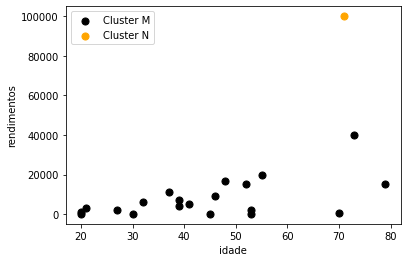

In [10]:
plt.scatter(base[previsoes == 0, 0], base[previsoes == 0, 1], s = 50, c = 'black', label = 'Cluster M')
plt.scatter(base[previsoes == 1, 0], base[previsoes == 1, 1], s = 50, c = 'orange', label = 'Cluster N')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()

# Transformação do tipo *StandardScaler*

Transformando estatisticamente os dados...

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
transform = scaler.fit_transform(base)
transform

array([[-1.46895976, -0.56135097],
       [-0.88801522, -0.55904811],
       [-0.01659842, -0.55444238],
       [ 0.44815721, -0.55904811],
       [ 1.43576293, -0.53371658],
       [-1.46895976, -0.51989939],
       [-1.41086531, -0.43239048],
       [-1.06229858, -0.46463061],
       [-0.77182631, -0.29421853],
       [-0.48135405, -0.05702335],
       [-0.36516514, -0.3771217 ],
       [-0.36516514, -0.24355548],
       [-0.24897623, -0.33106439],
       [ 0.04149604, -0.15144085],
       [ 0.15768495,  0.19398904],
       [ 0.39006276,  0.12490306],
       [ 0.44815721, -0.47614494],
       [ 0.56434612,  0.35518965],
       [ 1.49385738,  4.03977505],
       [ 1.61004629,  1.276336  ],
       [ 1.95861301,  0.12490306]])

In [13]:
pd.DataFrame(transform).describe()

,0,1
count,2.100000e+01,2.100000e+01
mean,1.057355e-17,-1.097006e-16
std,1.024695e+00,1.024695e+00
min,-1.468960e+00,-5.613510e-01
25%,-7.718263e-01,-5.198994e-01
50%,-1.659842e-02,-3.310644e-01
75%,4.481572e-01,1.249031e-01
max,1.958613e+00,4.039775e+00


In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
link = linkage(transform, method = 'ward')
link

array([[ 0.        ,  5.        ,  0.04145159,  2.        ],
       [ 3.        , 16.        ,  0.08290317,  2.        ],
       [10.        , 12.        ,  0.12498455,  2.        ],
       [ 6.        , 21.        ,  0.14184365,  3.        ],
       [11.        , 23.        ,  0.14419209,  3.        ],
       [ 1.        ,  7.        ,  0.19821542,  2.        ],
       [14.        , 15.        ,  0.24243003,  2.        ],
       [ 8.        , 26.        ,  0.34390338,  3.        ],
       [ 9.        , 25.        ,  0.37091011,  4.        ],
       [17.        , 27.        ,  0.40445798,  3.        ],
       [ 2.        , 13.        ,  0.40716728,  2.        ],
       [29.        , 31.        ,  0.63821195,  6.        ],
       [ 4.        , 20.        ,  0.84092333,  2.        ],
       [24.        , 28.        ,  0.94591905,  6.        ],
       [22.        , 30.        ,  1.15619552,  5.        ],
       [32.        , 35.        ,  1.57789422, 11.        ],
       [19.        , 33.

Text(0, 0.5, 'Distância Euclidiana Transformada')

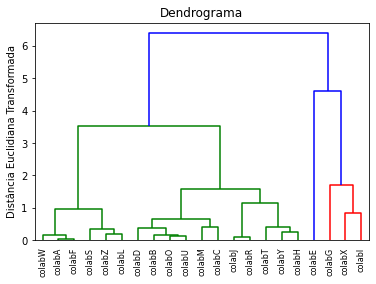

In [16]:
dendrogram(link, leaf_rotation=90, leaf_font_size=8, labels=df.index)
#dendrograma = dendrogram(link)
plt.title('Dendrograma')
plt.ylabel('Distância Euclidiana ''Transformada''')



---



In [17]:
hc = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
# hc = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
previsoes = hc.fit_predict(transform)
previsoes

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1])

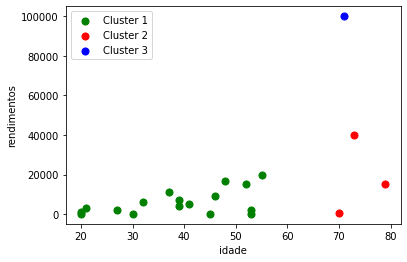

In [18]:
plt.scatter(base[previsoes == 0, 0], base[previsoes == 0, 1], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(base[previsoes == 1, 0], base[previsoes == 1, 1], s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(base[previsoes == 2, 0], base[previsoes == 2, 1], s = 50, c = 'blue', label = 'Cluster 3')
# plt.scatter(base[previsoes == 0, 0], base[previsoes == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
# plt.scatter(base[previsoes == 1, 0], base[previsoes == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()  

# TODO: Análise final apenas para dados em *base.csv*

Estudo de colaboradores de idade abaixo de 60 anos

In [19]:
# base = np.array([[20,100],[20,1000],[21,2900],[27,2200]
#                 ,[30,150],[32,5900],[37,11050],[39,4100],[39,7000]
#                 ,[41,5100],[45,250],[46,9000],[48,16500]
#                 ,[52,15000],[53,150],[53,1950],[55,20000]
#                  ])

In [20]:
# scaler = StandardScaler()
# transform = scaler.fit_transform(base)

In [21]:
# link = linkage(transform, method = 'ward')
# link

In [22]:
# dendrograma = dendrogram(link)
# plt.title('Dendrograma para maior cluster')
# plt.xlabel('Pessoas')
# plt.ylabel('Distância Euclidiana ''Transformada''')